# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Bunachita, Aidan\
_Student No._: 2020-10991\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [2]:
import numpy as np
import numpy.linalg as la

A = np.array(
    [[8,-2,-20],
     [-2,-3,-9],
     [-20,-9,-3]]
     )
print(la.eig(A))
evals, evecs = la.eig(A) # la.eig returns a 2-tuple containing the eigenvalues-array and its corresponding eigenvectors-array

AV =np.matmul(A,evecs)
VD = np.matmul(evecs, np.diag(evals))

print(AV-VD)

(array([-21.99606195,  23.83584674,   0.16021522]), array([[ 0.52496527,  0.76748685,  0.36793396],
       [ 0.40892672,  0.15169114, -0.89987151],
       [ 0.74645187, -0.62285932,  0.2342133 ]]))
[[-3.55271368e-15  3.55271368e-15  1.53349555e-15]
 [-3.55271368e-15  4.44089210e-16  4.44089210e-16]
 [-1.06581410e-14 -7.10542736e-15 -1.33226763e-15]]


### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

In [4]:
from math import exp, log
c = 2
f = lambda x: 1 - exp(-c*x)

exact = 0.796812            # the solution to x = f(x), up to 6 significant figures (according to Wolfram Alpha)
init = 1               # initial value of our approximate solution
stopper = 0

while abs((init - exact)/exact) > 10**(-6):  # doesn't stop the process until our guess value is within 6 significant figures of the exact answer.
    init = f(init)   
    print(init)                   # at each iteration, our guess-value *init* is replaced by *f(init)*
print(init)

0.8646647167633873
0.8225966691808597
0.8070247503317746
0.8009201942366403
0.7984747083247583
0.7974866394625985
0.797086049491047
0.796923413762181
0.7968573480008734
0.7968305046795713
0.7968195968986895
0.7968151643557075
0.7968133630966887
0.7968126311118457
0.7968126311118457


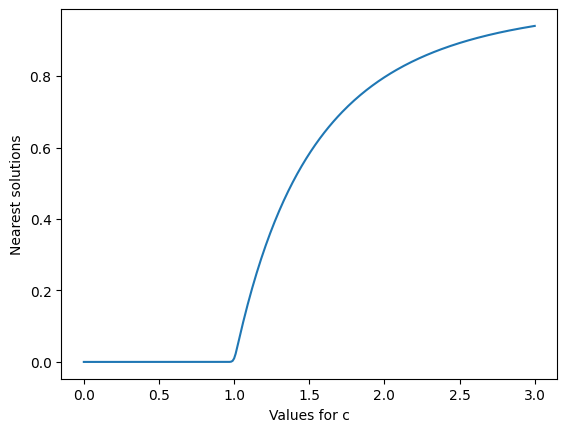

In [5]:
import matplotlib.pyplot as plt
c = 0
givens = []
solns1 = []

while c <= 3:
    givens.append(c)
    f = lambda x: 1-exp(-c*x)
    init1 = 1            # initial guess
    for _ in range(200): # relaxation method with 200 applications
        init1 = f(init1)
    solns1.append(init1)
    c += 0.01           # bump to next c-value

plt.plot(givens,solns1)
plt.xlabel("Values for c")
plt.ylabel("Nearest solutions")
plt.show()


Above is the graph of Solutions to the equation, for each value of $c.$ Here, the graph stays at $y = 0$ until $c = 1$. This makes sense: our function has two solutions, one of which ia $x = 0.$ Whenever $c < 1$, the other solution is **negative**, meaning given a positive initial guess, the closest solution will always be $x = 0$. And when $c = 1$, **both** solutions are $x = 0$.

Attempting to just make our initial guess negative, however, causes our answer to diverge. This means we'd have to *invert* our function first, then use the Relaxation method from there. Below, we see that:

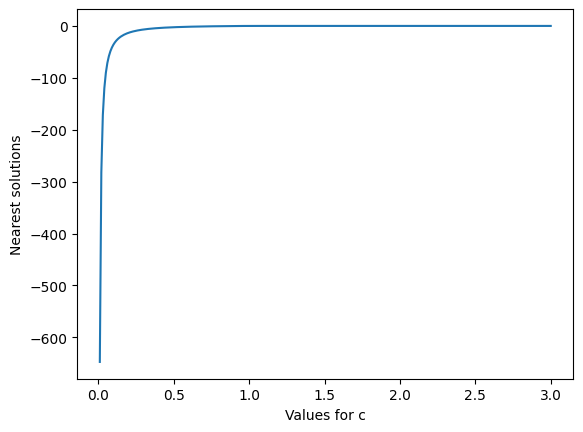

In [9]:
c = 0.01
givens = []     
solns2 = []         # new set of solutions, to see if the behavior we expect pops up

givens_zoomed = []  #
solns2_zoomed = []

while c <= 3:
    g = lambda x: -log(1 - x) / c   # our inverted function
    init2 = -1     # new initial guess, which is NEGATIVE
    for _ in range(200):
        init2 = g(init2)
    solns2.append(init2)
    givens.append(c)

    if init2 >= -1 and init2 < 0:  # zoomed-in section, where the final guess for some c is -1 <= x < 0
        solns2_zoomed.append(init2)
        givens_zoomed.append(c)

    c += 0.01

plt.plot(givens, solns2)
plt.xlabel("Values for c")
plt.ylabel("Nearest solutions")
plt.show()


where now, we recover the 2nd solutions to our equation whenever $c < 1.$ Here, notice that its y-values go to $0$ at around $c = 1$, again since at this point, the solutions are now **positive**, meaning $y = 0$ will always be our closest solution.

To confirm that it indeed has this behavior, we may zoom into the solutions where $-1 < y < 0$:

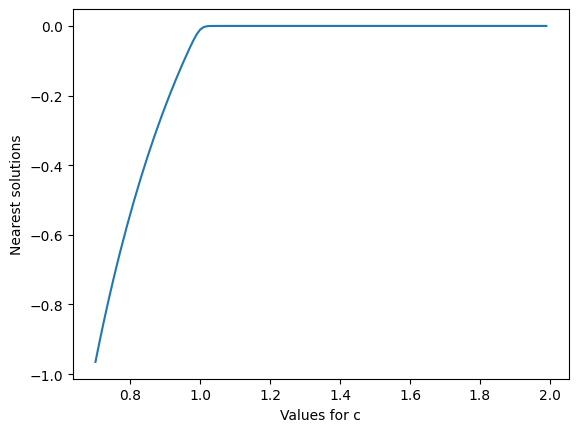

In [123]:
plt.plot(givens_zoomed,solns2_zoomed)
plt.xlabel("Values for c")
plt.ylabel("Nearest solutions")
plt.show()

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

In [133]:
# initializing constants
G = 6.674 * 10**(-11)
M = 5.974 * 10**(24)
m = 7.348 * 10**(22)
R = 3.844 * 10**(8)
ω = 2.662 * 10**(-6)

# initializing function F and its derivative f
F = lambda r: G*M*(R - r)**2 - G*m*r**2 - ω**2*r
f = lambda r: -2*G*M*(R-r) - 2*G*m*r - ω**2

# Newton's Method
init = 1
prev = 0     # value of our guess at the previous iteration; initially, its value CANNOT equal our first guess (otherwise the while statement we use terminates immediately.)

while abs((init-prev)/(init)) > 10**(-4):   # stops once our guess stops changing by a degree of more than 10^(-4).
    prev = init                             # stores the current guess...
    init = init - F(init)/f(init)           # ...then iterates it according to Newton's method

print(init)

346024120.78911716
